# 1. Data preprocessing #

#### Import related libraries for data preprocessing ####

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

#### Import dataset ####

In [2]:
original_data = pd.read_csv("../data/500_Person_Gender_Height_Weight_Index.csv")

In [3]:
original_data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


#### Specify index information ####

In [4]:
index_info = ['Extremly weak', 'Weak', 'Normal', 
              'Overweight','Obesity','Extreme obesity']

#### Check the ratio of obesity with original data ####

In [5]:
total_ratio = original_data['Index'].value_counts()/len(original_data['Index'])
for i in range(len(total_ratio)):
    print(index_info[i] + ": " + str(round(total_ratio[i]*100, 1)) + "%")

Extremly weak: 2.6%
Weak: 4.4%
Normal: 13.8%
Overweight: 13.6%
Obesity: 26.0%
Extreme obesity: 39.6%


#### Check missing values ####

In [6]:
print(" \nshow the boolean Dataframe : \n\n", original_data.isnull())
  
# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      original_data.isnull().sum())

 
show the boolean Dataframe : 

      Gender  Height  Weight  Index
0     False   False   False  False
1     False   False   False  False
2     False   False   False  False
3     False   False   False  False
4     False   False   False  False
..      ...     ...     ...    ...
495   False   False   False  False
496   False   False   False  False
497   False   False   False  False
498   False   False   False  False
499   False   False   False  False

[500 rows x 4 columns]
 
Count total NaN at each column in a DataFrame : 

 Gender    0
Height    0
Weight    0
Index     0
dtype: int64


#### Data split ####

In [7]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1004)
for train_idx, test_idx in split.split(original_data, original_data['Index']):
    train = original_data.loc[train_idx]
    test = original_data.loc[test_idx]

#### Check the ratio of obesity with test data ####

In [8]:
test_ratio = test['Index'].value_counts()/len(test['Index'])
for i in range(len(test_ratio)):
    print(index_info[i] + ": " + str(round(test_ratio[i]*100, 1)) + "%")

Extremly weak: 3.0%
Weak: 4.0%
Normal: 14.0%
Overweight: 14.0%
Obesity: 26.0%
Extreme obesity: 39.0%


#### Check the difference on data proportion between original data and test data #### 

In [9]:
group_ratio_diff = total_ratio - test_ratio
group_ratio_diff
    

0   -0.004
1    0.004
2   -0.002
3   -0.004
4    0.000
5    0.006
Name: Index, dtype: float64

#### Split data into features and target variable ####

In [10]:
train_X = train.iloc[:, 0:3]
train_y = train.iloc[:, 3:]
test_X = test.iloc[:, 0:3]
test_y = test.iloc[:, 3:]

# 2. Exploratoly Data Analytics #

In [11]:
import seaborn as sns

#### Visualize Height and Weight group by gender ####

<AxesSubplot:xlabel='Weight', ylabel='Height'>

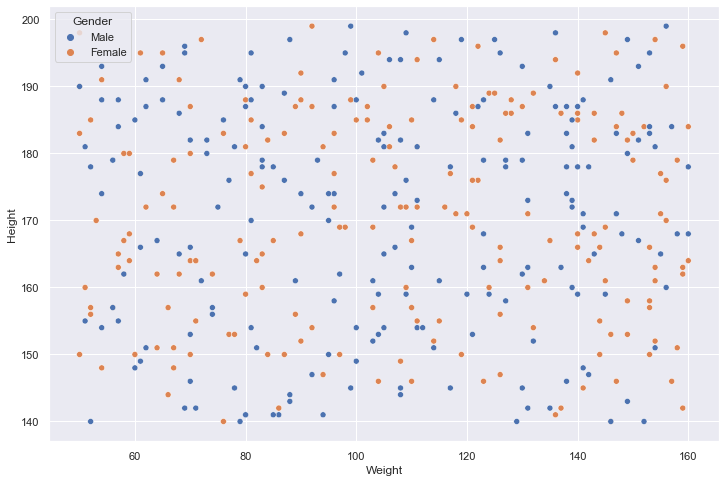

In [12]:
sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(x='Weight', y='Height', hue='Gender', data=train_X)

#### Visualize Height and Weight group by obesity ####

<AxesSubplot:xlabel='Weight', ylabel='Height'>

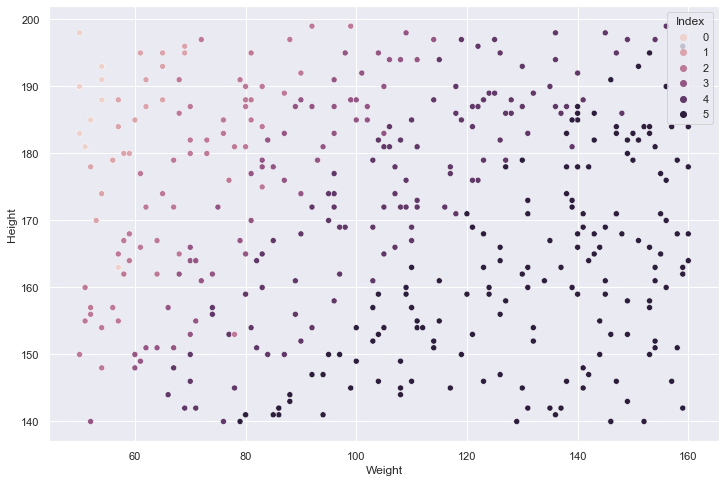

In [13]:
sns.scatterplot(x='Weight', y='Height', hue='Index', data=train)

# Modeling #

### Decision Tree ###

#### Preprocessing ####

In [79]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz

In [15]:
train_X.Gender = train_X.Gender.astype('category')

In [16]:
cleanup_nums = {"Gender": {"Male": 0, "Female": 1}}

In [17]:
train_X = train_X.replace(cleanup_nums)
test_X = test_X.replace(cleanup_nums)

In [18]:
train_X.Gender = train_X.Gender.astype('category')
test_X.Gender = test_X.Gender.astype('category')
train_y.Index = train_y.Index.astype('category')
test_y.Index = test_y.Index.astype('category')

#### Training and inferencing ####

In [83]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=4)              
clf = clf.fit(train_X, train_y)

In [84]:
res_pred = clf.predict(test_X)
score = accuracy_score(test_y, res_pred)
score

0.87

In [85]:
for i in range(100):
    if list(test_y['Index'])[i] != res_pred[i]:
        print(test_X.iloc[i, :]['Height'])
        print(test_X.iloc[i, :]['Weight'])
        print("Actual obesity:",index_info[list(test_y['Index'])[i]])
        print(clf.predict_proba(test_X)[i])
        print("Predicted as:",index_info[res_pred[i]])
        print("="*40)

174
90
Actual obesity: Overweight
[0.   0.   0.   0.25 0.75 0.  ]
Predicted as: Obesity
176
54
Actual obesity: Weak
[0.5 0.5 0.  0.  0.  0. ]
Predicted as: Extremly weak
177
101
Actual obesity: Obesity
[0.   0.   0.   0.75 0.25 0.  ]
Predicted as: Overweight
146
85
Actual obesity: Obesity
[0. 0. 0. 0. 0. 1.]
Predicted as: Extreme obesity
169
88
Actual obesity: Normal
[0. 0. 0. 0. 1. 0.]
Predicted as: Obesity
168
50
Actual obesity: Weak
[0.16666667 0.16666667 0.66666667 0.         0.         0.        ]
Predicted as: Normal
154
96
Actual obesity: Extreme obesity
[0. 0. 0. 0. 1. 0.]
Predicted as: Obesity
192
108
Actual obesity: Overweight
[0. 0. 0. 0. 1. 0.]
Predicted as: Obesity
157
60
Actual obesity: Normal
[0. 0. 0. 1. 0. 0.]
Predicted as: Overweight
180
60
Actual obesity: Normal
[0. 1. 0. 0. 0. 0.]
Predicted as: Weak
168
115
Actual obesity: Overweight
[0.   0.   0.   0.   0.75 0.25]
Predicted as: Obesity
147
84
Actual obesity: Obesity
[0. 0. 0. 0. 0. 1.]
Predicted as: Extreme obesity

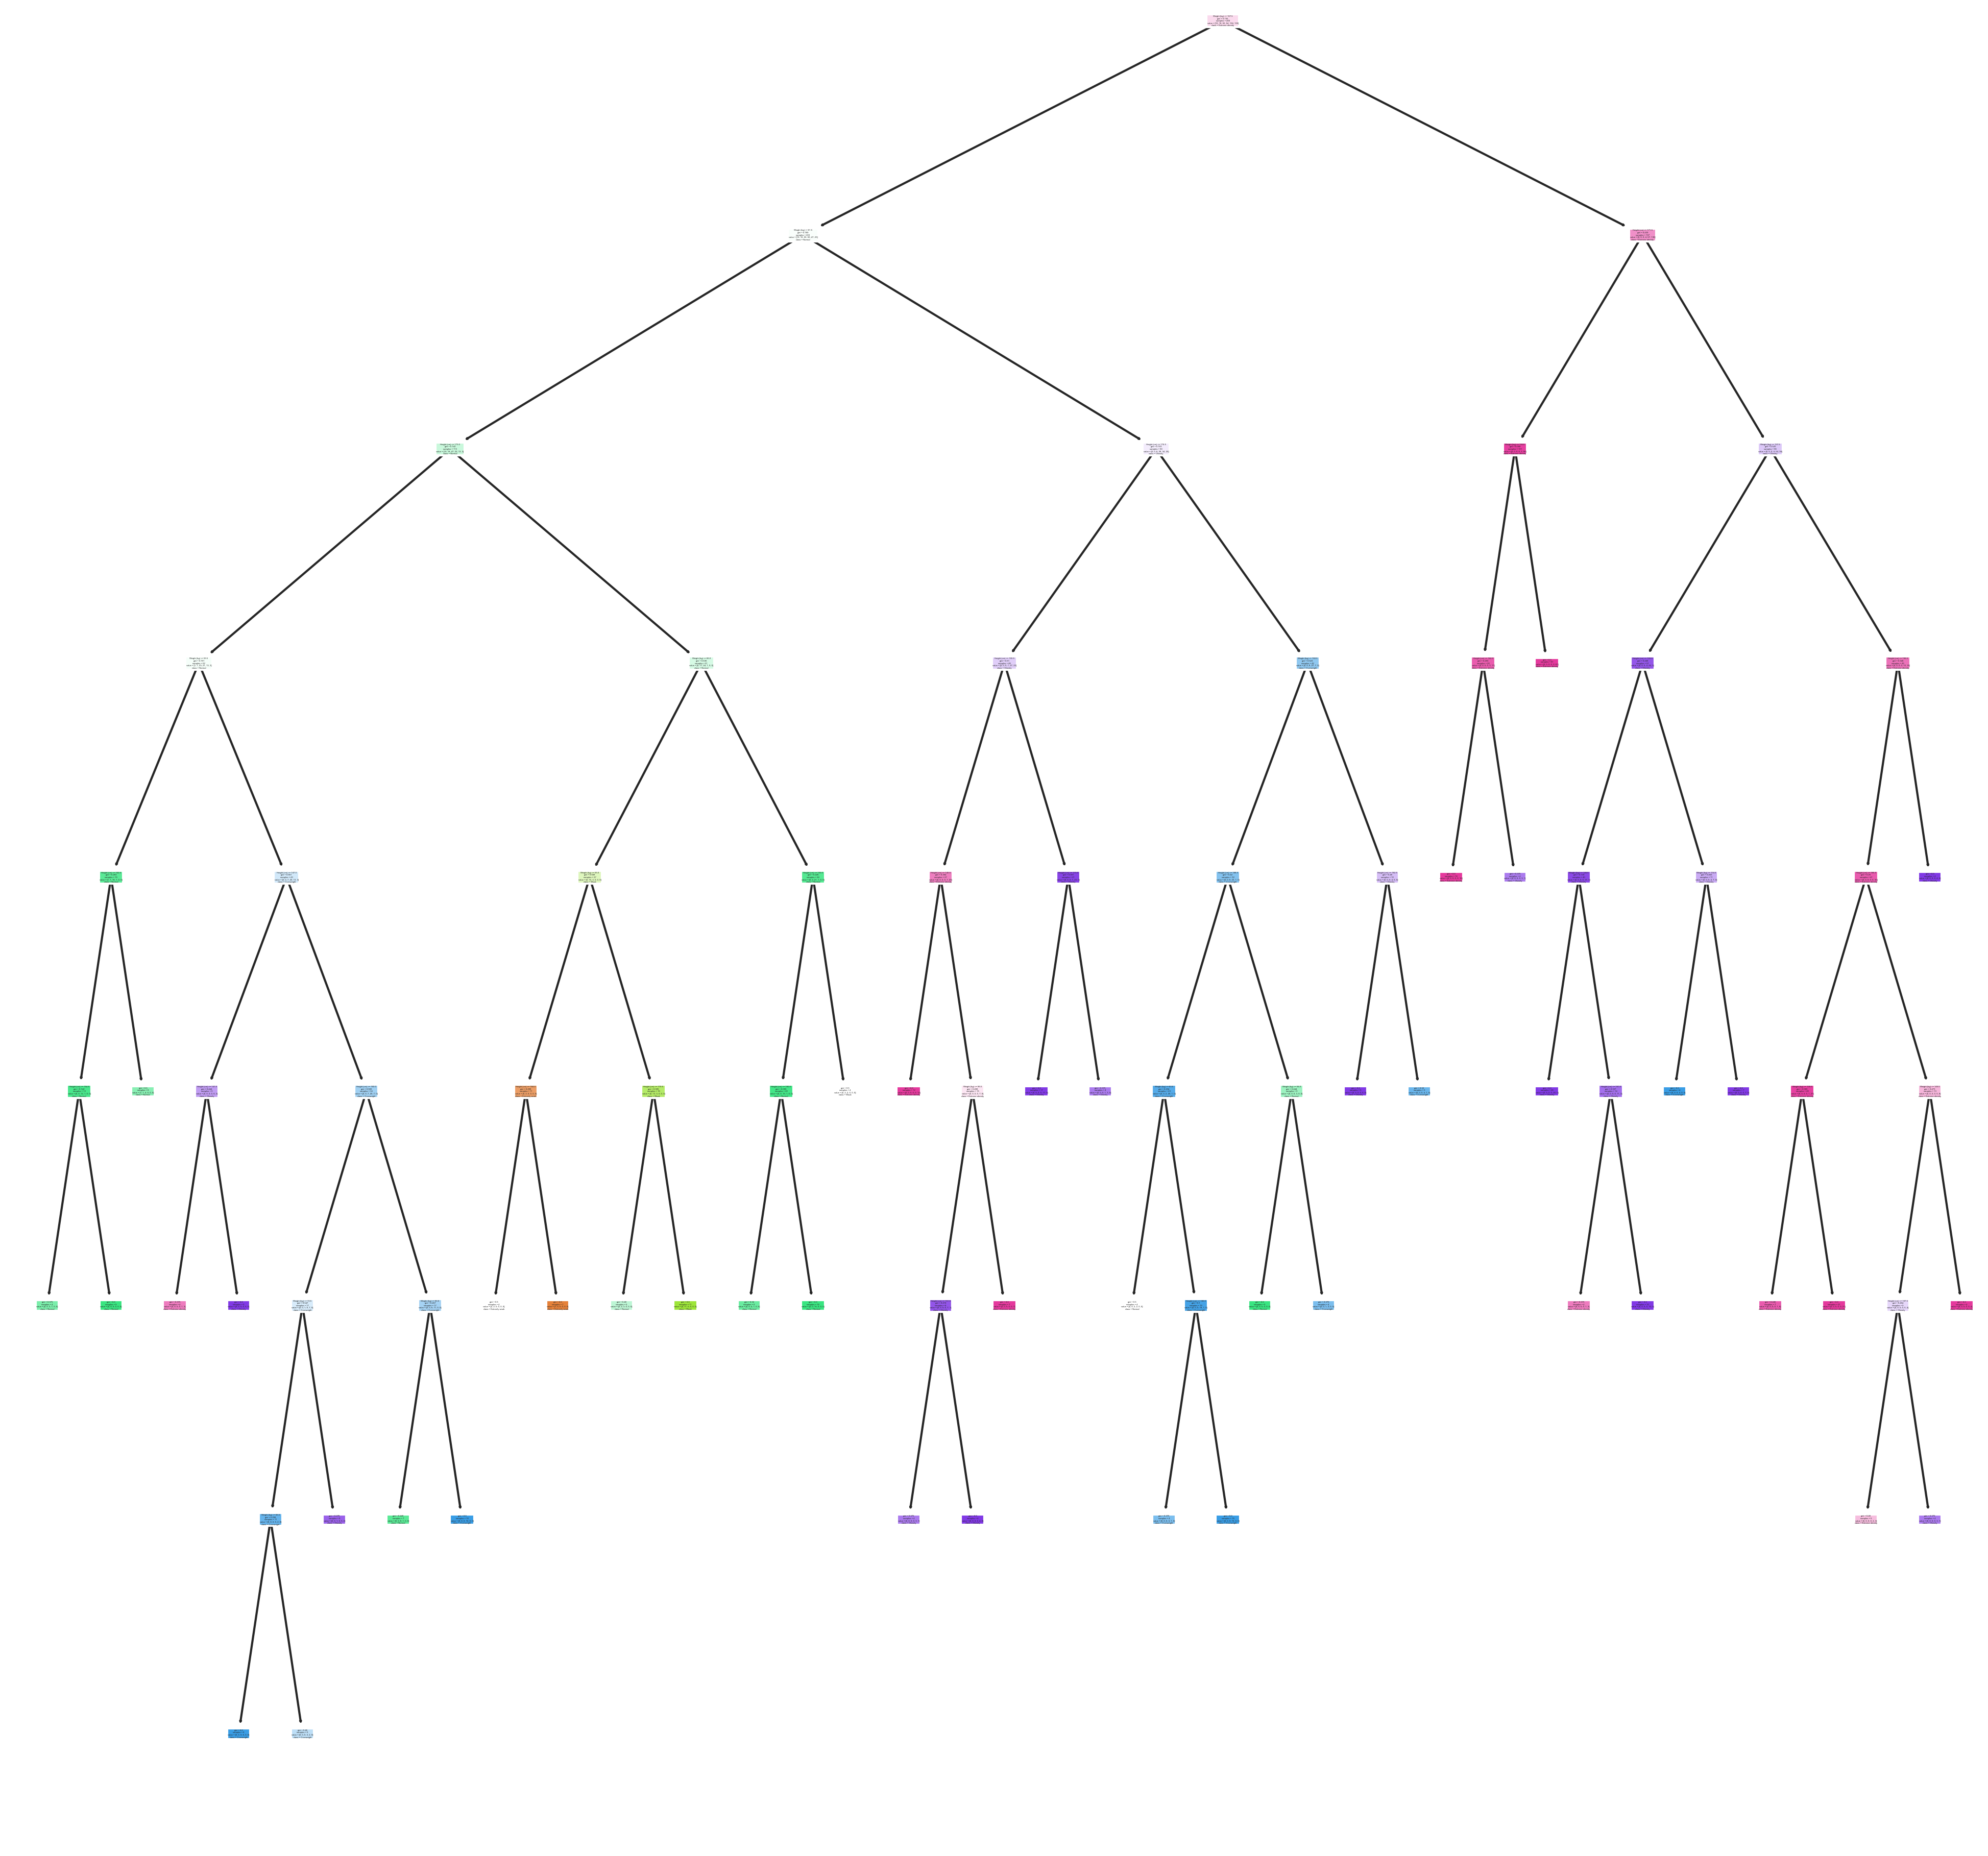

In [86]:
import matplotlib.pyplot as plt


fn=['Gender(0-male, 1-female)','Height (cm)','Weight (kg)']
cn=index_info

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf,
           feature_names = fn, 
           class_names=cn,
           filled = True);

fig.savefig('imagename.png')

### Random Forest ###

### Losgistic Regression ###

### Support Vector Machine ###

### Naive Bayes ###

### Neural Network ###